## **Library**



matplotlib 

- 데이터를 차트나 플롯 형태로 표시해주는 라이브러리 패키지로 가장 많이 사용되는 데이터 시각화 패키지
- 라인 플롯, 바 차트, 파이차트, 히스토그램 등 다양한 차트와 플롯 지원 
  - https://matplotlib.org/2.0.2/gallery.html 링크참고



seaborn

- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- 조금 더 명확하게 분포를 확인할 수 있음



missingno

- 데이터의 일부가 누락되는 결측 데이터를 찾는 기능을 제공하는 패키지
- 이 패키지를 사용하려면 데이터 프레임에 결측 데이터가 NaN(not a number) 값으로 저장되어 있어야 함





## **데이터 전처리 과정**



1. 데이터 구조 파악

   - 데이터 구조 
     - df.shpae
   - 데이터 타입
     - df.dtypes
   - 데이터 칼럼
     - df.columns


2. 결측치 탐색 

   - 전체 데이터에서 결측치 추출
     - df.isna().sum 
     

3. 데이터 분포 확인

   - 데이터 분포 확인 후 이상치 데이터 제거
       - 이상치 : 정규 분포표에서 표준편차를 벗어나는 데이터 
     
         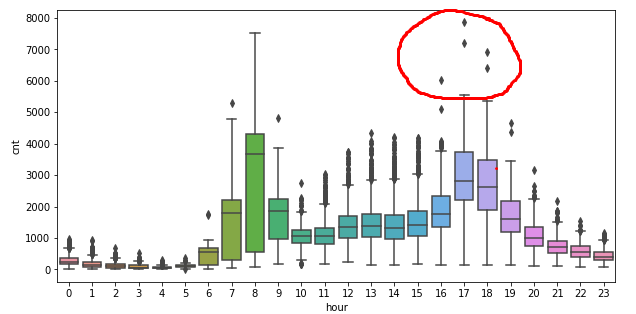
       
       

   - 날짜 코드 등을 Category 타입으로 변환
     - 특정 형태의 데이터가 반복되는 경우 사용 ex) 성별(남성,여성), 나이(10대,20대)
     - 반복된 데이터를 코드화하여 데이터의 사이즈를 줄여서 메모리 사용량이 즐어들고 데이터 처리속도가 빨라짐
     - astype('category' ) 로 형변환
     

   - 더미처리 : 기계학습을 위해 0, 1의 이진코드로 변환해주어야함
     - get_dummies
     - ex) pd.get_dummies(df_out, columns=['weather_code', 'season'])
     
         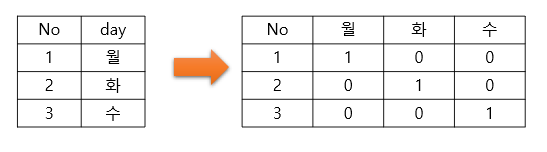


4. 훈련용, 테스트용 데이터를 분리

   - Overfitting 현상을 방지하기 위함
     - Overfitting 이란? 모델이 학습데이터에 과적합되어 이를 조금이라도 벗어난 케이스에 대해 예측율이 현저히 떨어지는 현상
   - ex) train_test_split(df_x, df_y, random_state=66, test_size=0.3, shuffle=False)
     - test_size : 테스트셋 구성비율(0.3 = 30%) default = 0.25
     - shuffle : split을 해주기 이전에 데이터를 섞을지 여부
     - stratify : classification을 다룰 때 중요한 옵션 (추후에 테스트해볼 예정)
     - random_state : 세트를 섞을 때 해당 int 값을 보고 섞어 매번 데이터 셋이 변경되는 것을 방지

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [7]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv', parse_dates = ['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [8]:
#데이터의 타입과 구조

print('데이터의 구조는:', df.shape)
print('데이터의 타입은:', df.dtypes)
print('데이터의 칼럼은:', df.columns)

데이터의 구조는: (17414, 10)
데이터의 타입은: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 칼럼은: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


### **결측치 탐색**

In [9]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

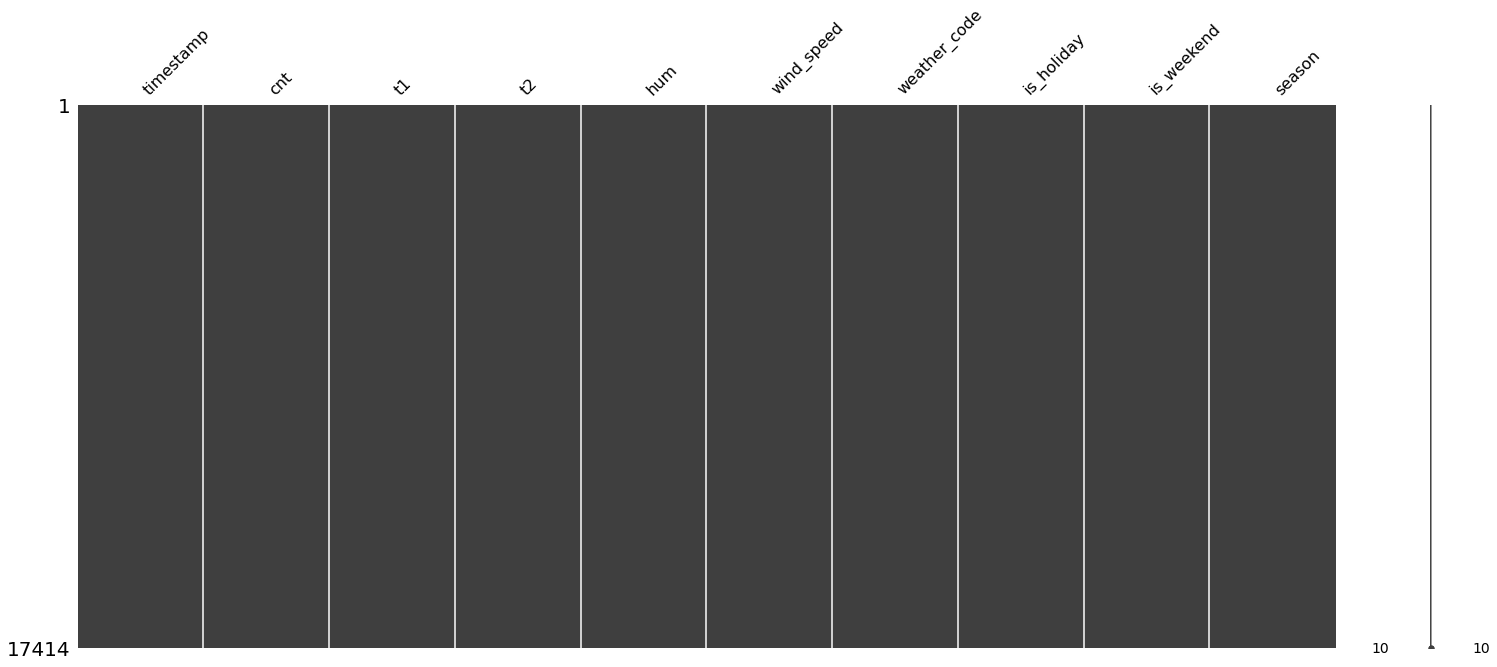

In [10]:
## 결측치 시각화

msno.matrix(df)
plt.show()

In [12]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

In [13]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [15]:
df['month'].value_counts()

5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: month, dtype: int64

### **연도별 자전거 이용자를 BoxPlot으로 표시**

<AxesSubplot:xlabel='year', ylabel='cnt'>

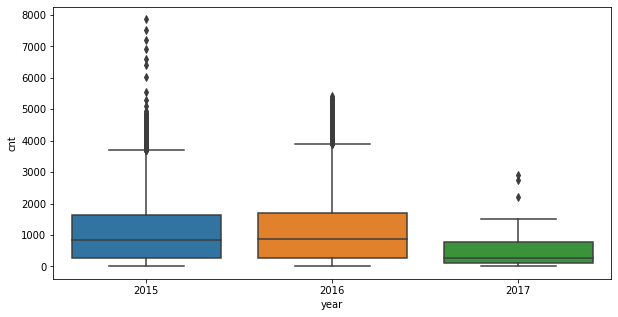

In [19]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(x = df['year'], y = df['cnt'])

### **월별 자전거 이용자를 BoxPlot으로 표시**

<AxesSubplot:xlabel='month', ylabel='cnt'>

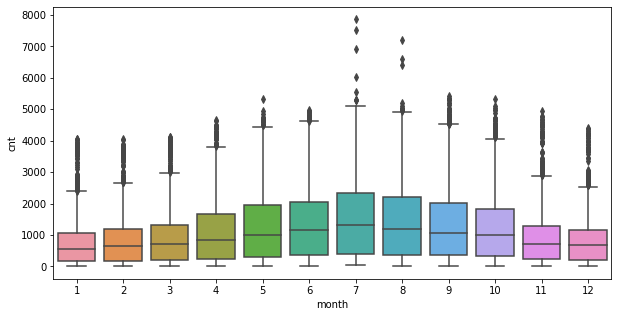

In [20]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(x = df['month'], y = df['cnt'])

### **시간대별 자전거 이용자를 BoxPlot으로 표시**

<AxesSubplot:xlabel='hour', ylabel='cnt'>

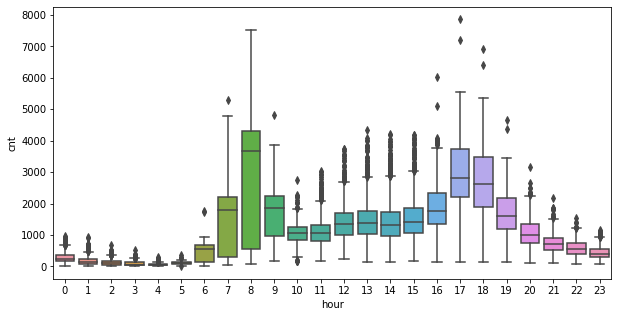

In [22]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(x = df['hour'], y = df['cnt'])

In [28]:
# 그래프 함수 만들기

def plot_bar(data, feature):
    fig = plt.figure(figsize=(12,3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3')

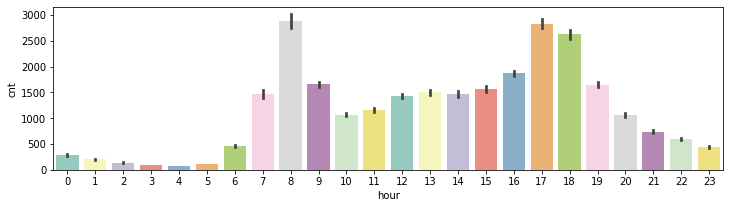

In [29]:
plot_bar(df, 'hour')

### **이상치 제거**

In [35]:
#아웃라이어(이상치) 제거

def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

In [36]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

print('이상치 제거전:', df.shape)
print('이상치 제거후:', df_out.shape)

이상치 제거전: (17414, 14)
이상치 제거후: (17265, 14)


In [38]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [39]:
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [40]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [41]:
df_out['season']

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: season, Length: 17265, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [42]:
#더미처리 : 딥러닝에서 기계학습을 위해 0,1 의 이진코드로 변환해주어야함

df_out = pd.get_dummies(df_out, columns=['weather_code', 'season', 'year', 'month', 'hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_out.shape

(17265, 59)

In [44]:
df_y = df_out['cnt']
df_x = df_out.drop(['timestamp', 'cnt'], axis=1)
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [46]:
#훈련용, 테스트용 데이터 분리

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=66, test_size=0.3, shuffle=False)

In [47]:
print('x_train의 구조는:', x_train.shape)
print('y_train의 구조는:', y_train.shape)

print('x_test의 구조는:', x_test.shape)
print('y_test의 구조는:', y_test.shape)

x_train의 구조는: (12085, 57)
y_train의 구조는: (12085,)
x_test의 구조는: (5180, 57)
y_test의 구조는: (5180,)
